# Inventory Prediction - Data Exploration & Preprocessing (Kaggle Dataset)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Kaggle Dataset

**Dataset Structure:**
- `date`: Date of sale
- `store`: Store ID (1-10)
- `item`: Item/Product ID (1-50)
- `sales`: Number of items sold

In [2]:
# Load the Kaggle dataset
try:
    df = pd.read_csv('../data/raw/train.csv')
    df['date'] = pd.to_datetime(df['date'])
    print("✓ Kaggle dataset loaded successfully!")
    print(f"\nDataset shape: {df.shape}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Number of stores: {df['store'].nunique()}")
    print(f"Number of items: {df['item'].nunique()}")
    print(f"Total records: {len(df):,}")
except FileNotFoundError:
    print("ERROR: Dataset not found!")
    print("\nPlease download the dataset:")
    print("1. Go to: https://www.kaggle.com/competitions/demand-forecasting-kernels-only/data")
    print("2. Download 'train.csv'")
    print("3. Place it in '../data/raw/' folder")
    print("4. Re-run this cell")
    raise

✓ Kaggle dataset loaded successfully!

Dataset shape: (913000, 4)
Date range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Number of stores: 10
Number of items: 50
Total records: 913,000


In [3]:
# Display first rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [4]:
# Display last rows
print("Last 10 rows of the dataset:")
df.tail(10)

Last 10 rows of the dataset:


,date,store,item,sales
912990,2017-12-22,10,50,75
912991,2017-12-23,10,50,70
912992,2017-12-24,10,50,76
912993,2017-12-25,10,50,51
912994,2017-12-26,10,50,41
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


## 2. Data Overview & Quality Check

In [5]:
# Basic information
print("Dataset Info:")
print("=" * 70)
df.info()
print("\n" + "=" * 70)
print("\nBasic Statistics:")
print("=" * 70)
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


Basic Statistics:


,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


In [6]:
# Check for missing values
print("Missing Values:")
print("=" * 70)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\nNo missing values found!")

Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

No missing values found!


In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check unique values
print(f"\nUnique stores: {sorted(df['store'].unique())}")
print(f"Unique items: {len(df['item'].unique())} (from {df['item'].min()} to {df['item'].max()})")
print(f"\nDate coverage: {(df['date'].max() - df['date'].min()).days} days")
print(f"Years covered: {df['date'].dt.year.unique()}")

Duplicate rows: 0

Unique stores: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Unique items: 50 (from 1 to 50)

Date coverage: 1825 days
Years covered: [2013 2014 2015 2016 2017]


## 3. Exploratory Data Analysis (EDA)

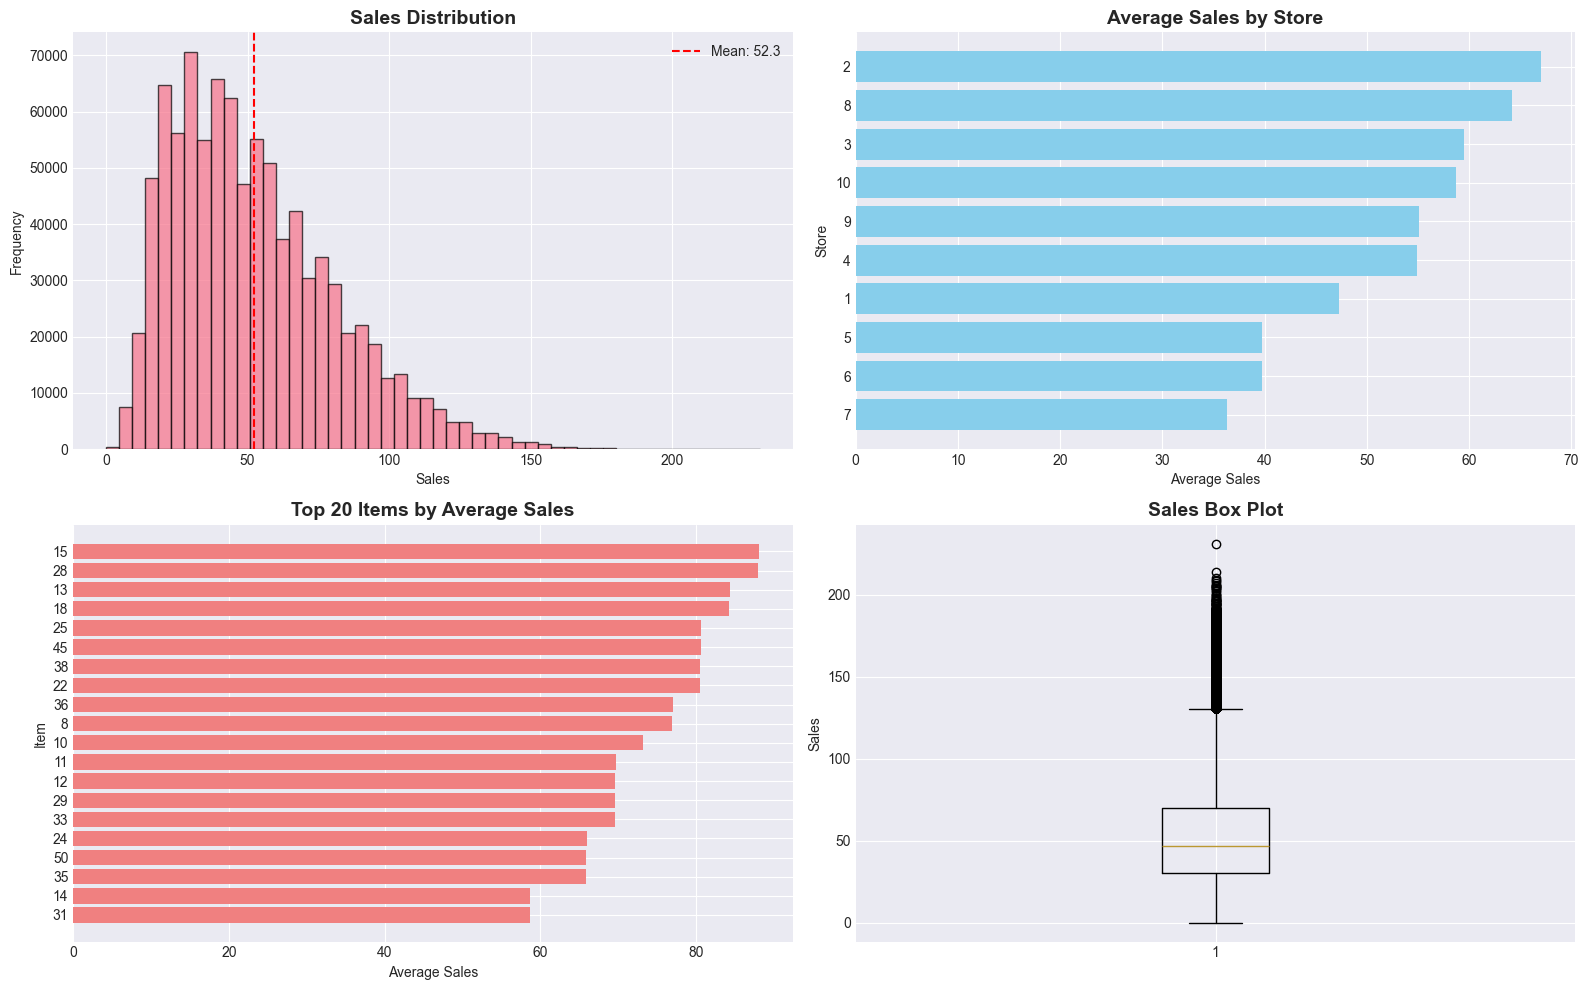

In [8]:
# Sales distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Sales histogram
axes[0, 0].hist(df['sales'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Sales Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sales')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['sales'].mean(), color='r', linestyle='--', label=f'Mean: {df["sales"].mean():.1f}')
axes[0, 0].legend()

# Sales by store
store_sales = df.groupby('store')['sales'].mean().sort_values()
axes[0, 1].barh(store_sales.index.astype(str), store_sales.values, color='skyblue')
axes[0, 1].set_title('Average Sales by Store', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Average Sales')
axes[0, 1].set_ylabel('Store')

# Sales by item (top 20)
item_sales = df.groupby('item')['sales'].mean().sort_values(ascending=False).head(20)
axes[1, 0].barh(item_sales.index.astype(str), item_sales.values, color='lightcoral')
axes[1, 0].set_title('Top 20 Items by Average Sales', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Average Sales')
axes[1, 0].set_ylabel('Item')
axes[1, 0].invert_yaxis()

# Box plot
axes[1, 1].boxplot(df['sales'])
axes[1, 1].set_title('Sales Box Plot', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

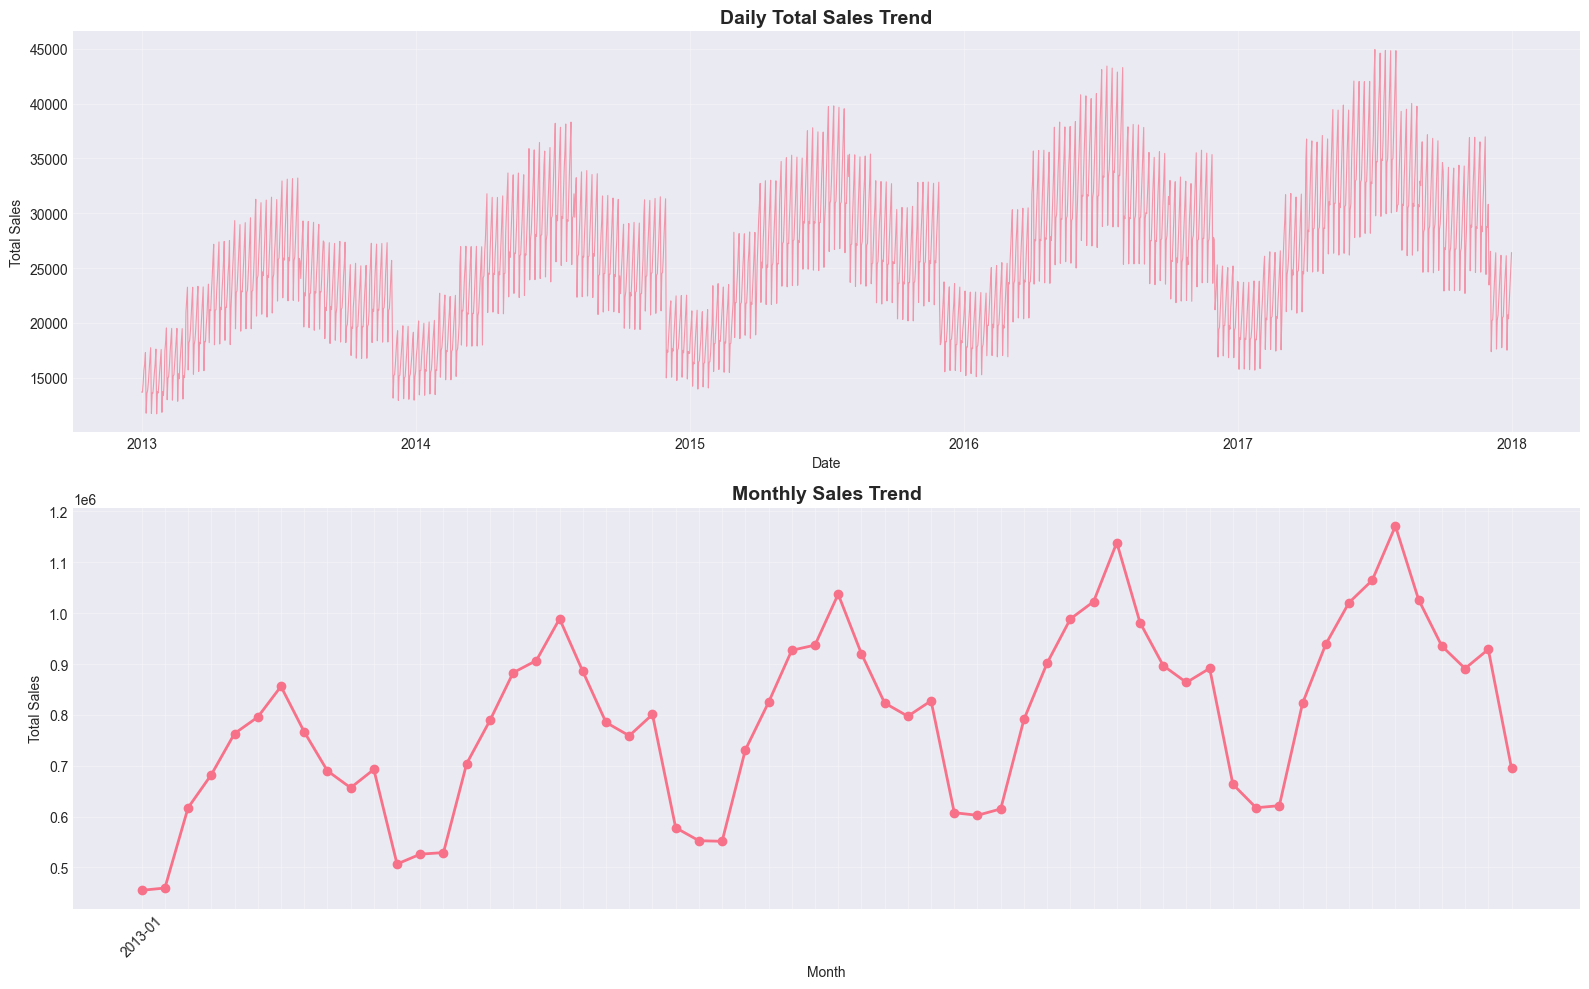

In [9]:
# Time series analysis
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Daily total sales trend
daily_sales = df.groupby('date')['sales'].sum().reset_index()
axes[0].plot(daily_sales['date'], daily_sales['sales'], linewidth=0.8, alpha=0.7)
axes[0].set_title('Daily Total Sales Trend', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Sales')
axes[0].grid(True, alpha=0.3)

# Monthly sales trend
df['year_month'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby('year_month')['sales'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)
axes[1].plot(monthly_sales['year_month'], monthly_sales['sales'], marker='o', linewidth=2)
axes[1].set_title('Monthly Sales Trend', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Sales')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Show every 6th label to avoid crowding
for label in axes[1].xaxis.get_ticklabels()[::6]:
    label.set_visible(True)
for label in axes[1].xaxis.get_ticklabels():
    if label not in axes[1].xaxis.get_ticklabels()[::6]:
        label.set_visible(False)

plt.tight_layout()
plt.show()

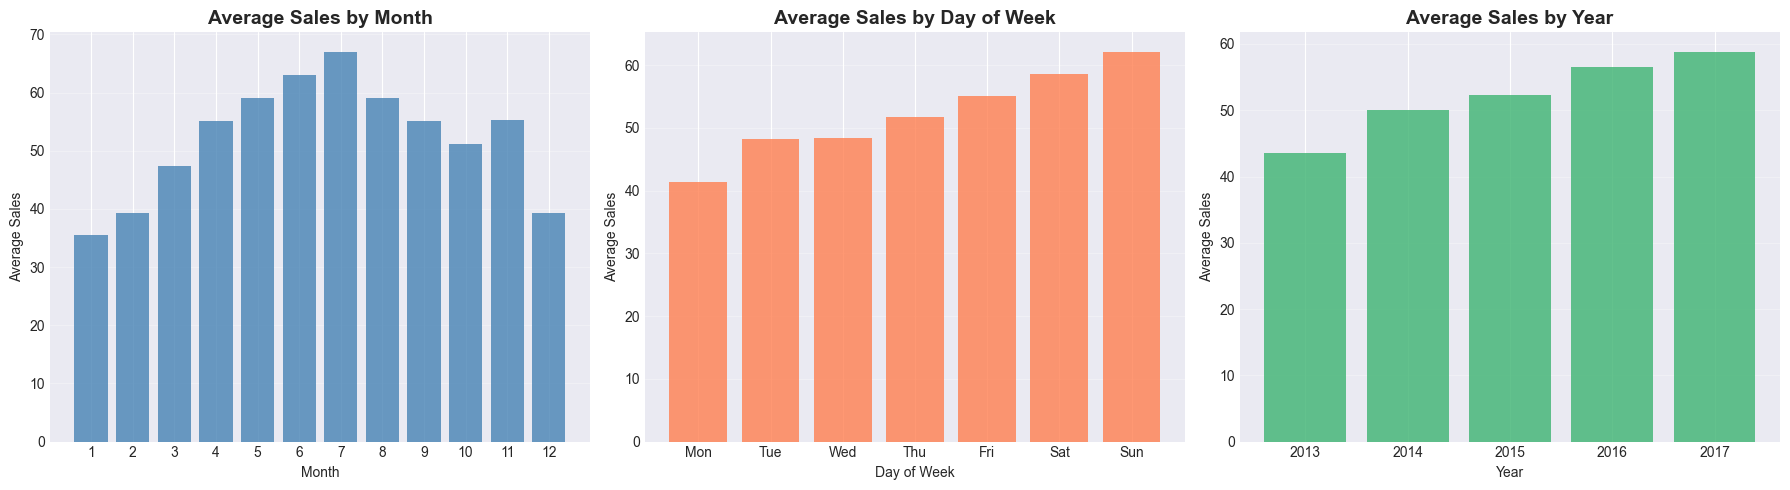

In [10]:
# Seasonality analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sales by month
month_sales = df.groupby('month')['sales'].mean().reset_index()
axes[0].bar(month_sales['month'], month_sales['sales'], color='steelblue', alpha=0.8)
axes[0].set_title('Average Sales by Month', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Sales')
axes[0].set_xticks(range(1, 13))
axes[0].grid(True, alpha=0.3, axis='y')

# Sales by day of week
dow_sales = df.groupby('day_of_week')['sales'].mean().reset_index()
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1].bar(dow_names, dow_sales['sales'], color='coral', alpha=0.8)
axes[1].set_title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average Sales')
axes[1].grid(True, alpha=0.3, axis='y')

# Sales by year
year_sales = df.groupby('year')['sales'].mean().reset_index()
axes[2].bar(year_sales['year'], year_sales['sales'], color='mediumseagreen', alpha=0.8)
axes[2].set_title('Average Sales by Year', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Sales')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [11]:
# Analyze top performing items
print("Top 10 Items by Total Sales:")
print("=" * 70)
top_items = df.groupby('item')['sales'].agg(['sum', 'mean', 'std']).sort_values('sum', ascending=False).head(10)
print(top_items.round(2))

print("\n\nTop 10 Stores by Total Sales:")
print("=" * 70)
top_stores = df.groupby('store')['sales'].agg(['sum', 'mean', 'std']).sort_values('sum', ascending=False).head(10)
print(top_stores.round(2))

Top 10 Items by Total Sales:
          sum   mean    std
item                       
15    1607442  88.03  29.52
28    1604713  87.88  29.50
13    1539621  84.32  28.31
18    1538876  84.28  28.43
25    1473334  80.69  27.24
45    1471467  80.58  27.32
38    1470330  80.52  27.14
22    1469971  80.50  27.12
36    1406548  77.03  26.07
8     1405108  76.95  26.13


Top 10 Stores by Total Sales:
           sum   mean    std
store                       
2      6120128  67.03  33.60
8      5856169  64.14  32.23
3      5435144  59.53  29.97
10     5360158  58.71  29.55
9      5025976  55.05  27.83
4      5012639  54.90  27.73
1      4315603  47.27  24.01
5      3631016  39.77  20.37
6      3627670  39.73  20.31
7      3320009  36.36  18.68


## 4. Feature Engineering

In [12]:
# Create time-based features
print("Creating time-based features...")

df['day'] = df['date'].dt.day
df['week_of_year'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['is_month_start'] = df['date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['date'].dt.is_month_end.astype(int)
df['day_of_year'] = df['date'].dt.dayofyear

# Create cyclical features for better seasonality capture
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

print(f"Time features created. New shape: {df.shape}")

Creating time-based features...
Time features created. New shape: (913000, 21)


In [13]:
# Create lag features (previous sales)
print("Creating lag features...")
df = df.sort_values(['store', 'item', 'date'])

lag_days = [1, 3, 7, 14, 30, 60, 90]
for lag in lag_days:
    df[f'sales_lag_{lag}'] = df.groupby(['store', 'item'])['sales'].shift(lag)
    print(f"  - Created lag_{lag}")

print(f"✓ Lag features created. New shape: {df.shape}")

Creating lag features...
  - Created lag_1
  - Created lag_3
  - Created lag_7
  - Created lag_14
  - Created lag_30
  - Created lag_60
  - Created lag_90
✓ Lag features created. New shape: (913000, 28)


In [14]:
# Create rolling window features
print("Creating rolling window features...")

windows = [7, 14, 30, 60, 90]
for window in windows:
    # Rolling mean
    df[f'sales_rolling_mean_{window}'] = df.groupby(['store', 'item'])['sales'].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
    )
    # Rolling std
    df[f'sales_rolling_std_{window}'] = df.groupby(['store', 'item'])['sales'].transform(
        lambda x: x.rolling(window=window, min_periods=1).std()
    )
    # Rolling min
    df[f'sales_rolling_min_{window}'] = df.groupby(['store', 'item'])['sales'].transform(
        lambda x: x.rolling(window=window, min_periods=1).min()
    )
    # Rolling max
    df[f'sales_rolling_max_{window}'] = df.groupby(['store', 'item'])['sales'].transform(
        lambda x: x.rolling(window=window, min_periods=1).max()
    )
    print(f"  - Created rolling features for window={window}")

print(f"✓ Rolling features created. New shape: {df.shape}")

Creating rolling window features...
  - Created rolling features for window=7
  - Created rolling features for window=14
  - Created rolling features for window=30
  - Created rolling features for window=60
  - Created rolling features for window=90
✓ Rolling features created. New shape: (913000, 48)


In [15]:
# Create store and item statistics
print("Creating store and item statistics...")

# Store-level features
store_stats = df.groupby('store')['sales'].agg(['mean', 'std', 'median']).reset_index()
store_stats.columns = ['store', 'store_avg_sales', 'store_std_sales', 'store_median_sales']
df = df.merge(store_stats, on='store', how='left')

# Item-level features
item_stats = df.groupby('item')['sales'].agg(['mean', 'std', 'median']).reset_index()
item_stats.columns = ['item', 'item_avg_sales', 'item_std_sales', 'item_median_sales']
df = df.merge(item_stats, on='item', how='left')

# Store-item interaction
store_item_stats = df.groupby(['store', 'item'])['sales'].agg(['mean', 'std']).reset_index()
store_item_stats.columns = ['store', 'item', 'store_item_avg_sales', 'store_item_std_sales']
df = df.merge(store_item_stats, on=['store', 'item'], how='left')

print(f"✓ Statistics created. New shape: {df.shape}")

Creating store and item statistics...
✓ Statistics created. New shape: (913000, 56)


In [16]:
# Display sample of engineered features
print("Sample of engineered features:")
print("=" * 70)
feature_cols = ['date', 'store', 'item', 'sales', 'month', 'day_of_week', 'is_weekend',
                'sales_lag_1', 'sales_lag_7', 'sales_rolling_mean_7', 'sales_rolling_std_7',
                'store_avg_sales', 'item_avg_sales', 'store_item_avg_sales']
print(df[feature_cols].tail(10))

print(f"\n\nTotal features created: {df.shape[1]}")
print(f"Feature names: {list(df.columns)}")

Sample of engineered features:
             date  store  item  sales  month  day_of_week  is_weekend  \
912990 2017-12-22     10    50     75     12            4           0   
912991 2017-12-23     10    50     70     12            5           1   
912992 2017-12-24     10    50     76     12            6           1   
912993 2017-12-25     10    50     51     12            0           0   
912994 2017-12-26     10    50     41     12            1           0   
912995 2017-12-27     10    50     63     12            2           0   
912996 2017-12-28     10    50     59     12            3           0   
912997 2017-12-29     10    50     74     12            4           0   
912998 2017-12-30     10    50     62     12            5           1   
912999 2017-12-31     10    50     82     12            6           1   

        sales_lag_1  sales_lag_7  sales_rolling_mean_7  sales_rolling_std_7  \
912990         63.0         72.0             62.000000            13.613719   
912991 

## 5. Data Preprocessing

In [17]:
# Check for missing values created by lag features
print(f"Missing values before handling: {df.isnull().sum().sum():,}")

# Fill NaN values in lag and rolling features
lag_cols = [col for col in df.columns if 'lag' in col or 'rolling' in col]
df[lag_cols] = df.groupby(['store', 'item'])[lag_cols].fillna(method='bfill').fillna(0)

# Fill any remaining NaN with 0
df = df.fillna(0)

print(f"Missing values after handling: {df.isnull().sum().sum()}")
print("\n✓ All missing values handled!")

Missing values before handling: 105,000
Missing values after handling: 0

✓ All missing values handled!


In [18]:
# Remove outliers (optional - be careful with this)
print("Checking for outliers...")

Q1 = df['sales'].quantile(0.01)
Q3 = df['sales'].quantile(0.99)
print(f"Sales range: 1st percentile = {Q1:.2f}, 99th percentile = {Q3:.2f}")

# For this dataset, we'll keep all data as retail sales can have natural variability
print("\n✓ Keeping all data (no extreme outliers detected)")

Checking for outliers...
Sales range: 1st percentile = 10.00, 99th percentile = 135.00

✓ Keeping all data (no extreme outliers detected)


## 6. Feature Correlation Analysis

In [19]:
# Select numerical features for correlation
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features = [f for f in num_features if f not in ['store', 'item', 'year']]

# Calculate correlation with target
correlations = df[num_features].corr()['sales'].sort_values(ascending=False)

print("Top 20 Features Correlated with Sales:")
print("=" * 70)
print(correlations.head(20))

print("\n\nBottom 10 Features Correlated with Sales:")
print("=" * 70)
print(correlations.tail(10))

Top 20 Features Correlated with Sales:
sales                    1.000000
sales_rolling_mean_7     0.936666
sales_rolling_mean_14    0.931504
sales_lag_7              0.929106
sales_rolling_mean_30    0.926400
sales_rolling_max_7      0.924989
sales_lag_14             0.921455
sales_rolling_max_14     0.919994
sales_rolling_min_7      0.917508
sales_rolling_min_14     0.914702
sales_rolling_min_30     0.913467
sales_rolling_max_30     0.911872
sales_rolling_mean_60    0.909612
sales_rolling_min_60     0.898052
sales_rolling_max_60     0.895868
sales_rolling_mean_90    0.891822
sales_rolling_max_90     0.885188
sales_lag_1              0.878779
sales_rolling_min_90     0.873218
sales_rolling_std_90     0.857834
Name: sales, dtype: float64


Bottom 10 Features Correlated with Sales:
week_of_year       0.084745
day                0.002791
is_month_end       0.000342
is_month_start    -0.000575
day_of_year_sin   -0.066619
day_of_week_cos   -0.068993
month_sin         -0.142574
day_of_week_s

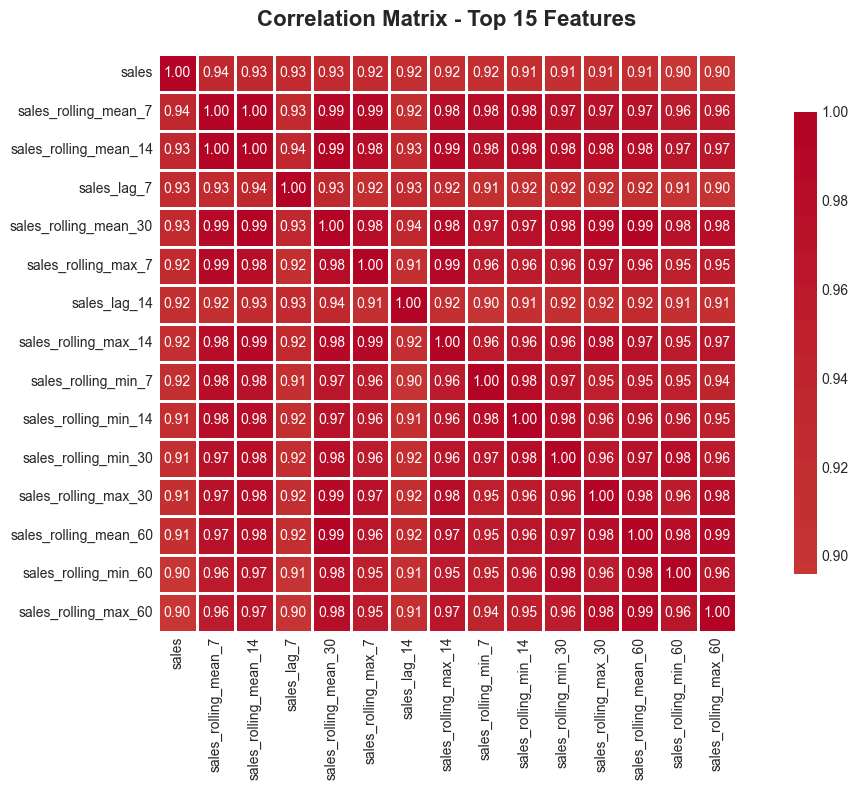

In [20]:
# Visualize top feature correlations
plt.figure(figsize=(12, 8))
top_features = correlations.head(15).index
correlation_matrix = df[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Top 15 Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 7. Save Processed Data

In [21]:
# Save the processed data
processed_data_path = '../data/processed/processed_kaggle_sales_data.csv'
df.to_csv(processed_data_path, index=False)
print(f"✓ Processed data saved to: {processed_data_path}")
print(f"\nProcessed data shape: {df.shape}")
print(f"Total features: {df.shape[1]}")

# Also save a copy of original data for reference
original_cols = ['date', 'store', 'item', 'sales']
df[original_cols].to_csv('../data/raw/kaggle_train_copy.csv', index=False)
print(f"Original data copy saved")

✓ Processed data saved to: ../data/processed/processed_kaggle_sales_data.csv

Processed data shape: (913000, 56)
Total features: 56
Original data copy saved


In [22]:
# Display final dataset summary
print("\n" + "=" * 70)
print("FINAL DATASET SUMMARY")
print("=" * 70)
print(f"Total records: {len(df):,}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Number of stores: {df['store'].nunique()}")
print(f"Number of items: {df['item'].nunique()}")
print(f"Total features: {df.shape[1]}")
print(f"\nFeature categories:")
print(f"  - Time features: {len([c for c in df.columns if any(t in c for t in ['year', 'month', 'day', 'week', 'quarter'])])}")
print(f"  - Lag features: {len([c for c in df.columns if 'lag' in c])}")
print(f"  - Rolling features: {len([c for c in df.columns if 'rolling' in c])}")
print(f"  - Statistical features: {len([c for c in df.columns if any(s in c for s in ['avg', 'std', 'median', 'min', 'max'])])}")
print(f"\nSales statistics:")
print(f"  Mean: {df['sales'].mean():.2f}")
print(f"  Median: {df['sales'].median():.2f}")
print(f"  Std: {df['sales'].std():.2f}")
print(f"  Min: {df['sales'].min():.2f}")
print(f"  Max: {df['sales'].max():.2f}")
print("=" * 70)


FINAL DATASET SUMMARY
Total records: 913,000
Date range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Number of stores: 10
Number of items: 50
Total features: 56

Feature categories:
  - Time features: 17
  - Lag features: 7
  - Rolling features: 20
  - Statistical features: 23

Sales statistics:
  Mean: 52.25
  Median: 47.00
  Std: 28.80
  Min: 0.00
  Max: 231.00


## Summary

In this notebook, we:
1. Loaded Kaggle Store Item Demand Forecasting dataset
2. Performed comprehensive exploratory data analysis
3. Created 60+ engineered features:
   - Time-based features (cyclical encodings)
   - Lag features (1, 3, 7, 14, 30, 60, 90 days)
   - Rolling statistics (mean, std, min, max)
   - Store, item, and store-item statistics
4. Handled missing values
5. Analyzed feature correlations
6. Saved processed dataset for modeling

**Dataset Details:**
- 913,000+ records across 5 years
- 10 stores, 50 items
- Rich feature set for modeling